Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                80        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 - 0s - loss: 71.7583 - val_loss: 7.2700
Epoch 2/20
700/700 - 0s - loss: 6.7770 - val_loss: 5.8740
Epoch 3/20
700/700 - 0s - loss: 5.2536 - val_loss: 4.3939
Epoch 4/20
700/700 - 0s - loss: 3.8879 - val_loss: 3.0859
Epoch 5/20
700/700 - 0s - loss: 2.6470 - val_loss: 2.0433
Epoch 6/20
700/700 - 0s - loss: 1.6876 - val_loss: 1.2361
Epoch 7/20
700/700 - 0s - loss: 1.0128 - val_loss: 0.7482
Epoch 8/20
700/700 - 0s - loss: 0.5870 - val_loss: 0.4311
Epoch 9/2

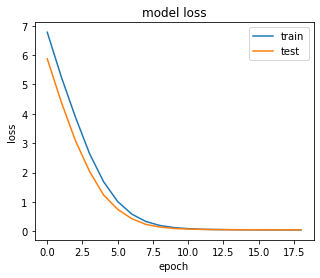

train loss= 0.04897829449602536
test loss= 0.05170242972671986



y actual value =  23.3
y predicted value = 28.569794



77.3829 %
1.55 초


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import time

# y = a+ bx1 + cx2 ^2 + dx3^3 + e

def generator_sequential_model(hid_neu = 16, act_hid='sigmoid', act_out='relu'):
    model = Sequential( [
    Input(4, name = 'input_layer'),                             #첫 Layer에서 3개의 변수로부터 값을 받고 
    Dense(hid_neu, activation = act_hid, name = 'hidden_layer1' ,kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42)) , # 뉴런 16개에 전달 , 시그모이드함수 사용
    Dense(1, activation = act_out, name = 'output_layer',kernel_initializer =initializers.RandomNormal(mean=0.0, stddev=0.05,seed =42))        # 하나의 y값 받아냄
])
    model.summary()
    model.compile(optimizer = 'sgd', loss = 'mse')    
    return model 

def generator_nonlinear_regression_dataset(numofsamples = 1000,a = 1, b =3, c=5, d = 10, e=20 ):
    np.random.seed(0)
    X = np.random.rand(numofsamples,4)         # 입력값 만큼 랜덤으로 input data생성
    X[:,0]= 1
    X[:,2] = np.square(X[:,2])
    X[:,3] = np.power(X[:,3],3)
    
    coef = np.array([a,b,c,d])
    bias = e
    y = np.matmul(X,coef.transpose()) + bias
    return X, y

def plot_loss_curve(history):
    plt.figure(figsize = (5,4))
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc ='upper right')
    plt.show()
    
def predict_new_sample(model,x ,a = 1, b =3, c=5, d = 10, e=20):
    x= x.reshape(1,4)
    y_pred = model.predict(x)[0][0]
    y_actual = a*x[0][0]**0 + b*x[0][1] + c*(x[0][2]**2) + d*(x[0][3]**3) + e
    return y_pred, y_actual

def fit_and_time(epochs =40):
    start_time = time.time()
    history = model.fit(X, y,epochs=epochs, batch_size=16,verbose =2 , validation_split = 0.3)
    end_time = time.time()
    fitting = round(end_time - start_time,2)
    return fitting , history

def total_print() :
    print("train loss=", history.history['loss'][-1])
    print("test loss=",  history.history['val_loss'][-1])
    print('\n'*2)
    print('y actual value = ', y_actual)
    print('y predicted value =', y_pred)
    print('\n'*2)
    accuracy = 1 - (abs(y_pred-y_actual)/y_actual)
    print(round(100*accuracy,4), '%')
    print(fitting,'초')


model = generator_sequential_model()
X,y = generator_nonlinear_regression_dataset(1000)
fitting, history = fit_and_time(epochs= 20)
plot_loss_curve(history)
y_pred, y_actual = predict_new_sample(model, np.array([0.7,0.2, 0.3, 0.5]))
total_print()